# 
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

In [19]:
df=pd.read_csv('avocado.csv')

In [36]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [26]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

# 
Date - The date of the observation

AveragePrice - the average price of a single

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold 

Type - conventional or organic

Year - the year

Region - the city or region of the observation

In [30]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

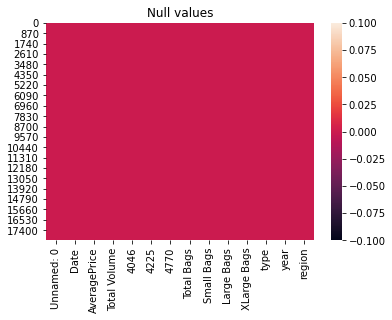

In [33]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

# 
There is no null value 

# EDA

In [30]:
summary = pd.pivot_table(index = 'year', values = ['Total Volume', 'AveragePrice', 'Total Bags'], data = df, 
               aggfunc = {'Total Volume' : sum, 'AveragePrice' : np.mean, 'Total Bags' : sum}).style.background_gradient(cmap = 'Set2')
summary

,AveragePrice,Total Bags,Total Volume
year,,,
2015,1.375590,772192237.029997,4385468662.039960
2016,1.338640,1463158866.520004,4820889891.829979
2017,1.515128,1646288747.340006,4934305699.270029
2018,1.347531,491535947.500000,1382738340.260003


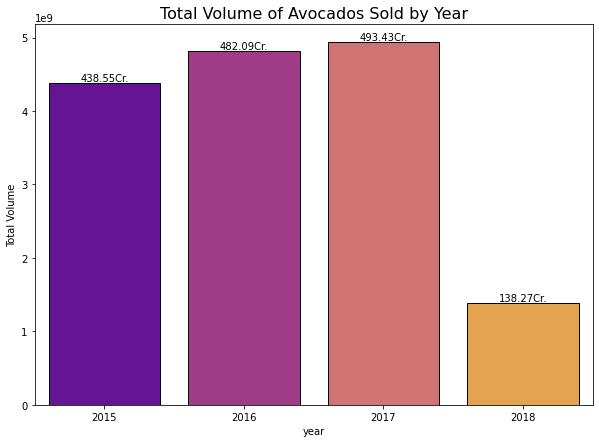

In [32]:
plt.rcParams['figure.figsize'] = (10, 7)

grouped = df.groupby('year')['Total Volume'].sum().reset_index()
ax = sns.barplot(x = 'year', y = 'Total Volume', linewidth = 1, edgecolor = 'k', data = grouped, palette = 'plasma')
for index, row in grouped.iterrows():
    ax.text(row.name, row['Total Volume'], str(round(row['Total Volume'] / 10000000, 2)) + 'Cr.', color = 'k', ha = 'center', va = 'bottom')
plt.title('Total Volume of Avocados Sold by Year', fontsize = 16)
plt.show()

# 
As seen in the graph, the sales of avocados increase with time except 2018. This sounds to be a sharp decline in sales, but it is possibly due to the fact that we do not have the data for the entire year of 2018

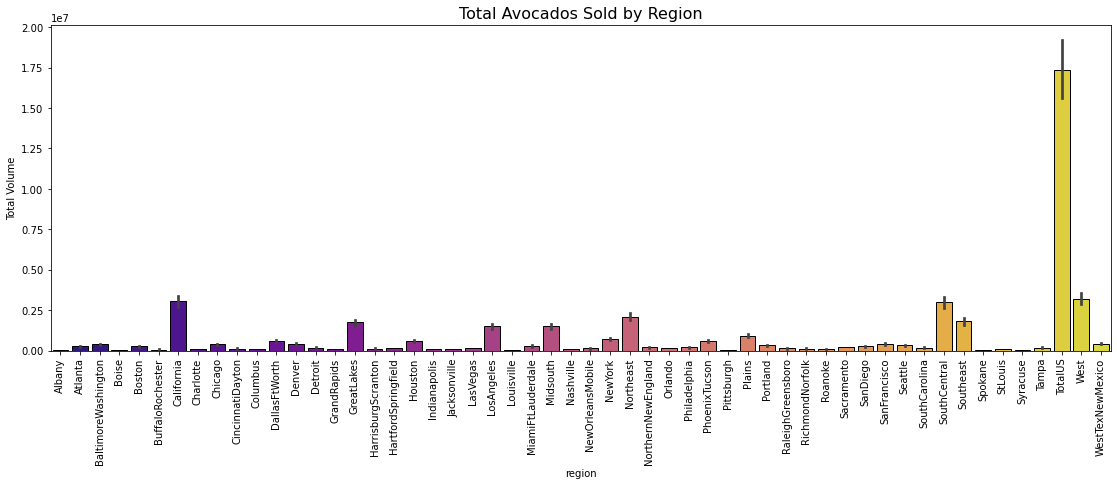

In [38]:
plt.rcParams['figure.figsize'] = (19, 6)

sns.barplot(x = 'region', y = 'Total Volume', data = df, palette = 'plasma', linewidth = 1, edgecolor = 'k')
plt.xticks(rotation = 90)
plt.title('Total Avocados Sold by Region', fontsize = 16)
plt.show()

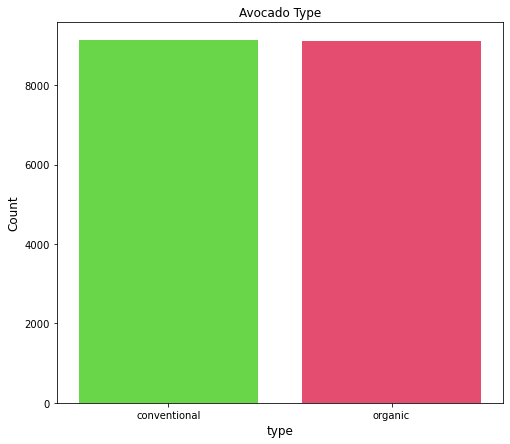

In [48]:
count = df['type'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('type', fontsize=12)
plt.title('Avocado Type')
plt.show()

Text(0.5, 1.0, 'year - price lineplot')

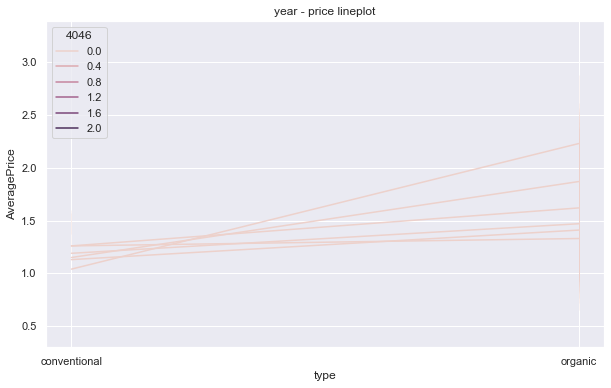

In [57]:
fig,ax =plt.subplots(figsize=(10,6))
sns.lineplot(data=df, y='AveragePrice', x='type', hue='4046')
plt.title("year - price lineplot")

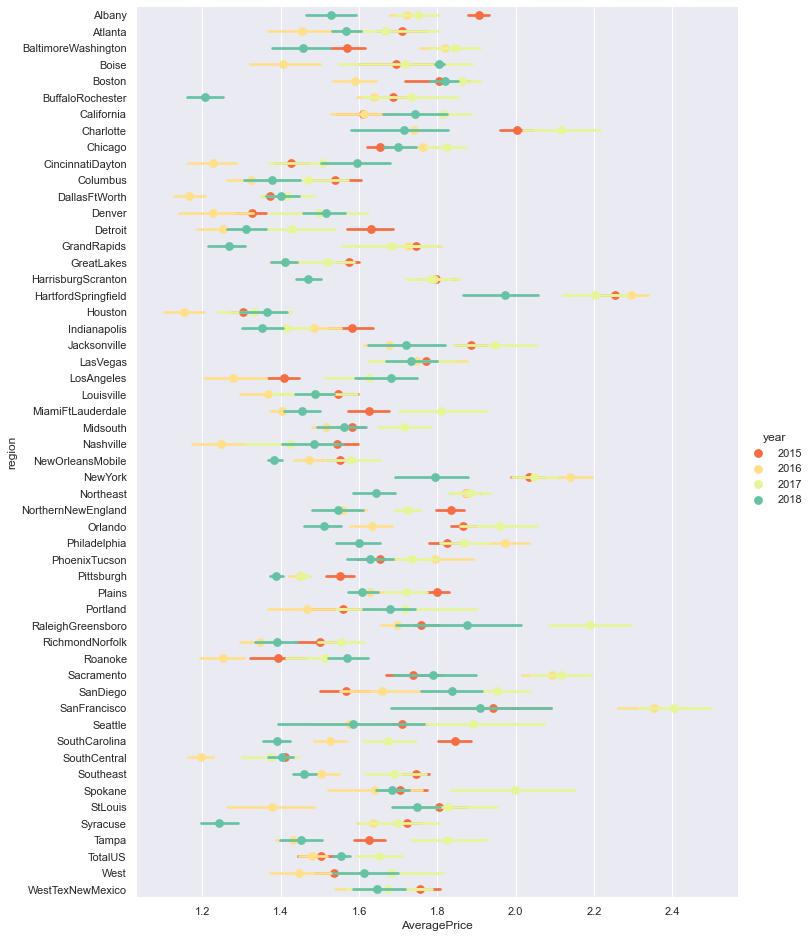

In [61]:
mask = df['type']=='organic'
g = sns.factorplot('AveragePrice','region',data=df[mask],
    hue='year',size=13,aspect=0.8,palette='Spectral',join=False)
g

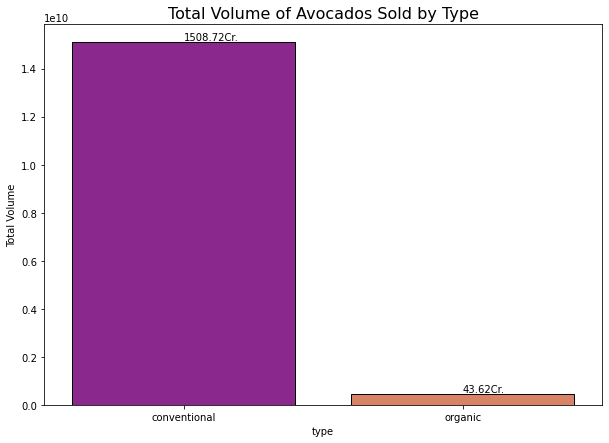

In [49]:
plt.rcParams['figure.figsize'] = (10, 7)

grouped_type_total = df.groupby('type')['Total Volume'].sum().reset_index()
ax = sns.barplot(x = 'type', y = 'Total Volume', data = grouped_type_total, palette = 'plasma', linewidth = 1, edgecolor = 'k')
for index, row in grouped_type_total.iterrows():
    ax.text(row.name, row['Total Volume'], str(round(row['Total Volume'] / 10000000, 2)) + 'Cr.', color = 'k', va = 'bottom')
plt.title('Total Volume of Avocados Sold by Type', fontsize = 16)
plt.show()

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>],
       [<AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'region'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

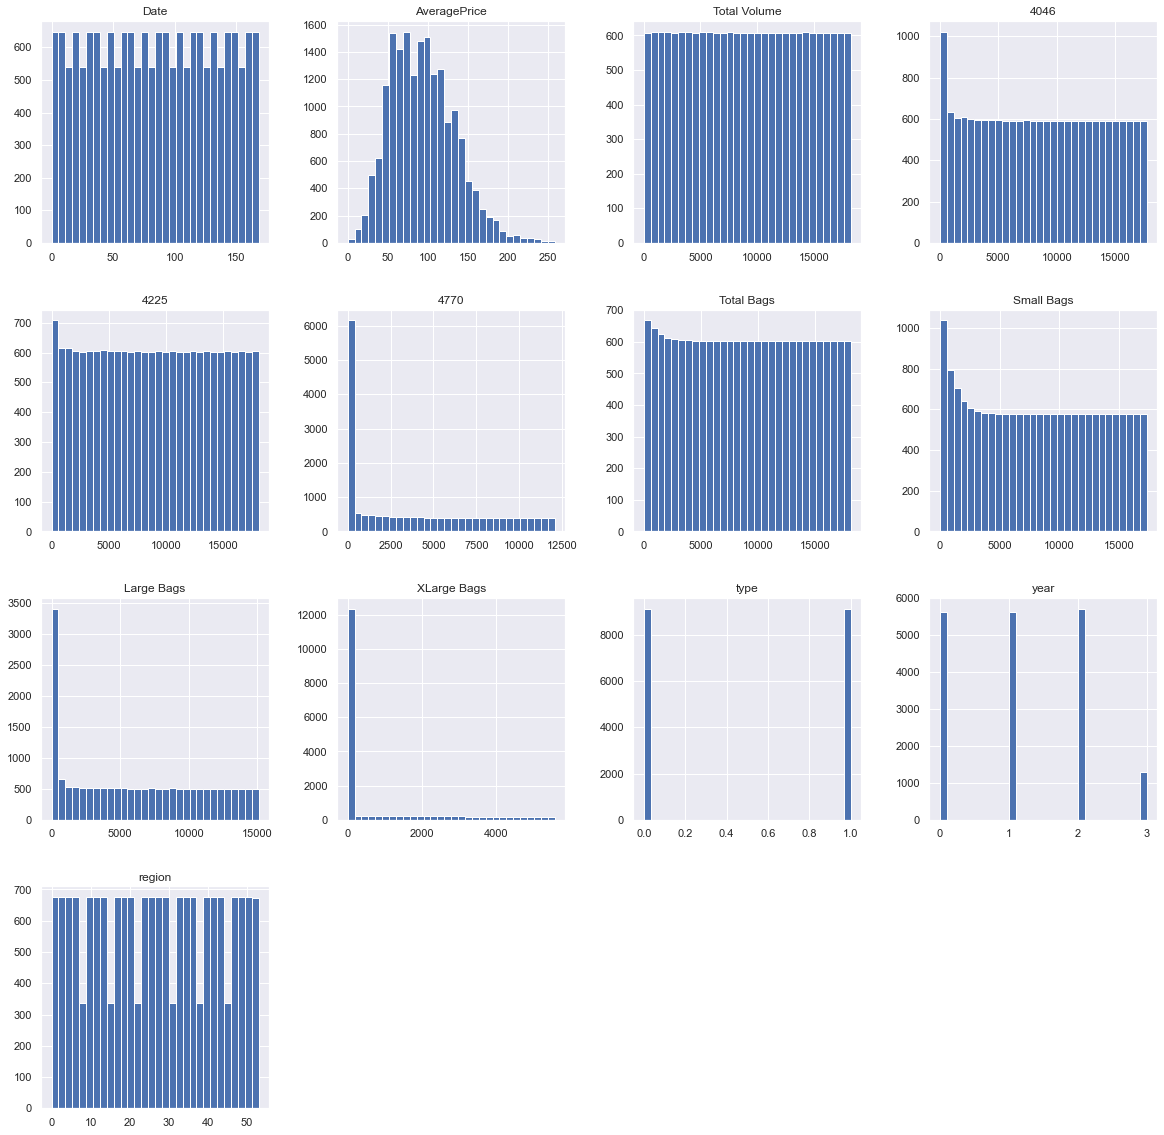

In [121]:
df.hist(figsize=(20,20), grid = True, layout = (4,4), bins = 30)

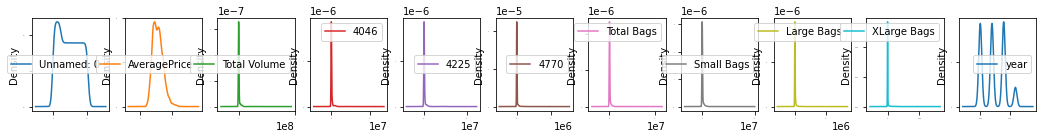

In [50]:
df.plot(kind='density' , subplots=True, layout=(6,11), sharex=False, fontsize=1, figsize=(18,12))
plt.show()

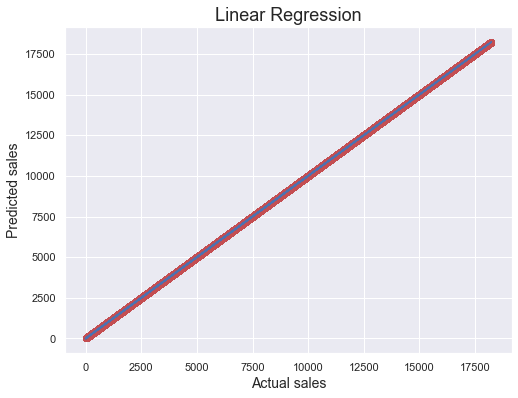

In [123]:
plt.figure(figsize=(8,6))
plt.scatter(x=df,y=df,color='r')
plt.plot(df,df,color='b')
plt.xlabel('Actual sales',fontsize=14)
plt.ylabel('Predicted sales',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [67]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,86,7931,4383,10872,1400,5780,5782,1264,0,0,0,0
1,50,88,7645,3616,10213,1570,6013,5972,1288,0,0,0,0
2,49,46,9388,3891,12864,2516,5616,5625,1328,0,0,0,0
3,48,61,8374,4545,11751,1789,4727,4880,1513,0,0,0,0
4,47,81,7540,4201,10157,1836,4874,4985,1855,0,0,0,0


In [82]:
from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,86,7931,4383,10872,1400,5780,5782,1264,0,0,0,0
1,50,88,7645,3616,10213,1570,6013,5972,1288,0,0,0,0
2,49,46,9388,3891,12864,2516,5616,5625,1328,0,0,0,0
3,48,61,8374,4545,11751,1789,4727,4880,1513,0,0,0,0
4,47,81,7540,4201,10157,1836,4874,4985,1855,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161,116,5729,5810,3188,0,6785,6648,2676,0,1,3,53
18245,160,124,5233,4653,4757,0,5955,5864,2340,0,1,3,53
18246,159,140,5203,4654,3928,4712,5985,5961,818,0,1,3,53
18247,158,146,5616,5183,4402,4710,6360,6284,901,0,1,3,53


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Date          18249 non-null  int64
 1   AveragePrice  18249 non-null  int64
 2   Total Volume  18249 non-null  int64
 3   4046          18249 non-null  int64
 4   4225          18249 non-null  int64
 5   4770          18249 non-null  int64
 6   Total Bags    18249 non-null  int64
 7   Small Bags    18249 non-null  int64
 8   Large Bags    18249 non-null  int64
 9   XLarge Bags   18249 non-null  int64
 10  type          18249 non-null  int64
 11  year          18249 non-null  int64
 12  region        18249 non-null  int64
dtypes: int64(13)
memory usage: 1.8 MB


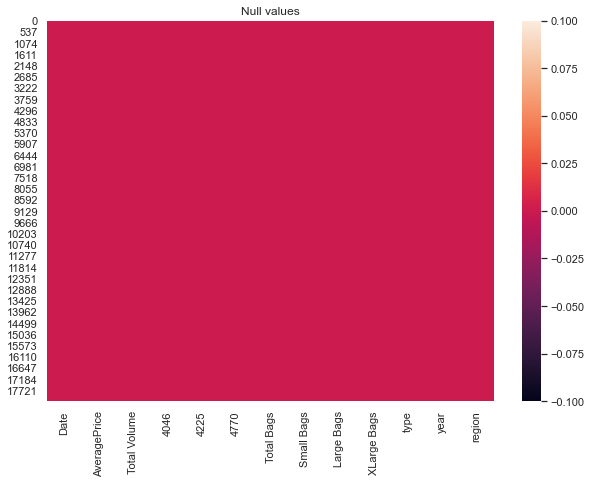

In [84]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

In [73]:
df.shape

(18249, 13)

In [74]:
df.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,83.997096,93.595265,9114.688312,8601.745356,8984.864376,4029.833142,8982.184777,8263.606115,6261.255850,893.316894,0.499918,1.147899,26.495644
std,48.787638,40.253995,5265.433348,5232.888735,5258.854866,3996.027809,5253.461654,5168.860788,4852.398211,1569.392283,0.500014,0.939938,15.583788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,63.000000,4554.000000,4032.000000,4426.000000,0.000000,4414.000000,3651.000000,1479.000000,0.000000,0.000000,0.000000,13.000000
50%,84.000000,90.000000,9113.000000,8579.000000,8979.000000,2993.000000,8973.000000,8199.000000,5969.000000,0.000000,0.000000,1.000000,26.000000
75%,126.000000,119.000000,13675.000000,13139.000000,13540.000000,7508.000000,13534.000000,12758.000000,10520.000000,1270.000000,1.000000,2.000000,40.000000
max,168.000000,258.000000,18236.000000,17701.000000,18102.000000,12070.000000,18096.000000,17320.000000,15081.000000,5587.000000,1.000000,3.000000,53.000000


In [75]:
print(df.corr())

                  Date  AveragePrice  Total Volume      4046      4225  \
Date          1.000000      0.145533      0.074852  0.000498 -0.004087   
AveragePrice  0.145533      1.000000     -0.589341 -0.570148 -0.490201   
Total Volume  0.074852     -0.589341      1.000000  0.903278  0.940148   
4046          0.000498     -0.570148      0.903278  1.000000  0.793995   
4225         -0.004087     -0.490201      0.940148  0.793995  1.000000   
4770         -0.065781     -0.513770      0.810884  0.741457  0.801623   
Total Bags    0.198822     -0.581311      0.952844  0.838443  0.857661   
Small Bags    0.175062     -0.525067      0.928842  0.826777  0.838541   
Large Bags    0.172256     -0.498835      0.708302  0.647191  0.639056   
XLarge Bags   0.159309     -0.339222      0.600745  0.562309  0.577395   
type         -0.000060      0.615982     -0.808491 -0.748193 -0.780779   
year          0.950274      0.093216      0.085824  0.011444  0.006278   
region       -0.000101     -0.011796  

<function matplotlib.pyplot.show(close=None, block=None)>

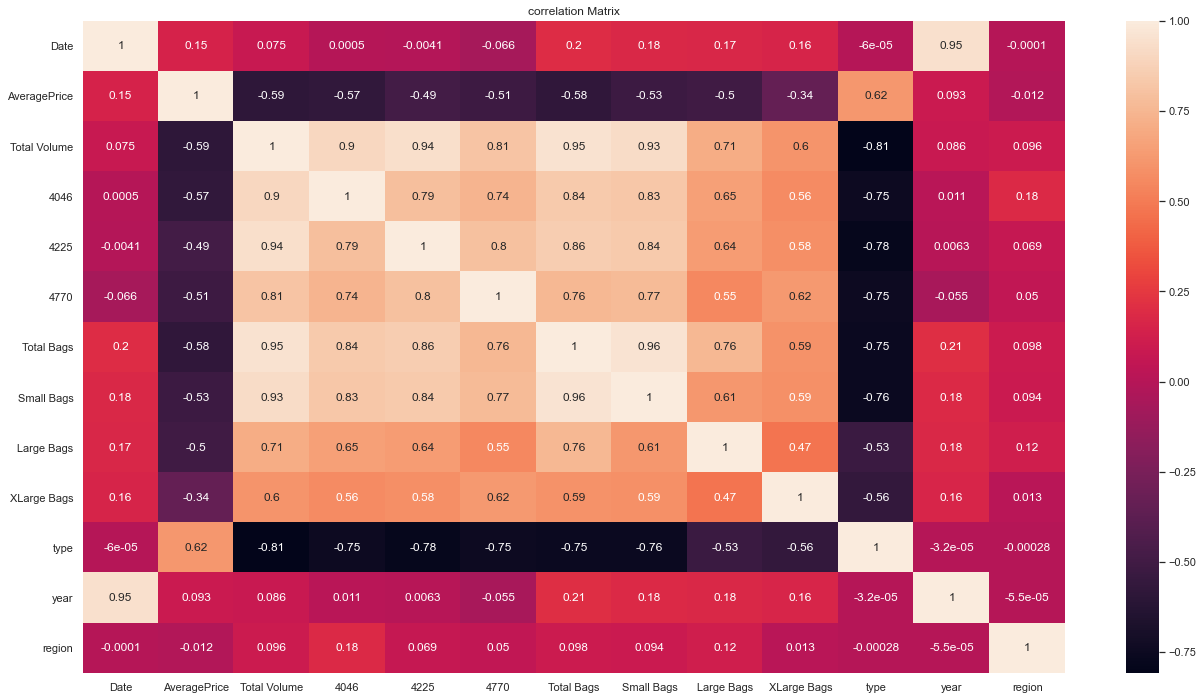

In [76]:
corr_mat=df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show

In [77]:
corr_matrix=df.corr()
corr_matrix["type"].sort_values(ascending=False)

type            1.000000
AveragePrice    0.615982
year           -0.000032
Date           -0.000060
region         -0.000280
Large Bags     -0.527684
XLarge Bags    -0.561368
4770           -0.748100
4046           -0.748193
Total Bags     -0.754928
Small Bags     -0.757381
4225           -0.780779
Total Volume   -0.808491
Name: type, dtype: float64

In [78]:
x= df.drop('type' ,axis=1)
y= df["type"]

In [79]:
x.skew()

Date            0.000117
AveragePrice    0.577300
Total Volume    0.000753
4046            0.016272
4225            0.003850
4770            0.510735
Total Bags      0.007023
Small Bags      0.048568
Large Bags      0.188522
XLarge Bags     1.610157
year            0.215339
region          0.000030
dtype: float64

<AxesSubplot:>

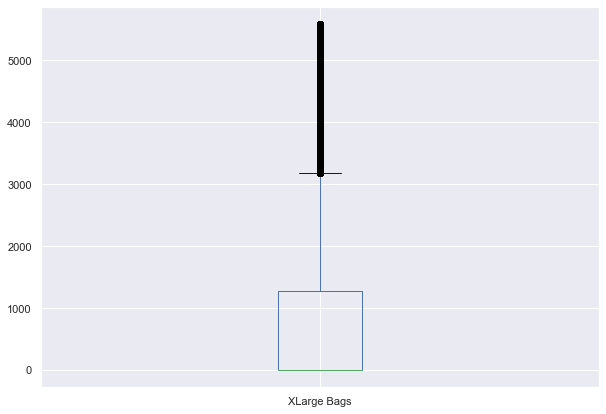

In [85]:
df['XLarge Bags'].plot.box()

In [86]:
from scipy.stats import zscore

In [88]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([11320, 11321, 11323, 11324, 11325, 11326, 11327, 11328, 11329,
        11330, 11331, 11332, 12821, 12823, 13033, 13035, 13037, 13038,
        13395, 13657, 13661, 14019, 14020, 14073, 14074, 14119, 14120,
        14121, 14122, 14123, 14124, 14125, 14126, 14128, 14129, 14177,
        14385, 14699, 14701, 14702, 14807, 14911, 14912, 14913, 14914,
        14915, 14916, 14917, 14918, 14919, 15124, 15125, 15127, 15128,
        15129, 15130, 15510, 15511, 15667, 15668, 15671, 15673, 15674,
        15814, 15871, 16024, 16050, 16055, 16395, 16399, 16421, 16660,
        16661, 16662, 16663, 16664, 16665, 16666, 16667, 16714, 16715,
        16717, 16718, 16719, 16720, 16721, 16734, 16737, 16738, 16985,
        16986, 16994, 16995, 16996, 16997, 16998, 16999, 17000, 17007,
        17008, 17009, 17010, 17015, 17017, 17031, 17032, 17033, 17034,
        17035, 17036, 17037, 17038, 17039, 17040, 17047, 17244, 17245,
        17246, 17247, 17248, 17249, 17250, 17251, 17255, 17300, 17301,
      

In [90]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,86,7931,4383,10872,1400,5780,5782,1264,0,0,0,0
1,50,88,7645,3616,10213,1570,6013,5972,1288,0,0,0,0
2,49,46,9388,3891,12864,2516,5616,5625,1328,0,0,0,0
3,48,61,8374,4545,11751,1789,4727,4880,1513,0,0,0,0
4,47,81,7540,4201,10157,1836,4874,4985,1855,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161,116,5729,5810,3188,0,6785,6648,2676,0,1,3,53
18245,160,124,5233,4653,4757,0,5955,5864,2340,0,1,3,53
18246,159,140,5203,4654,3928,4712,5985,5961,818,0,1,3,53
18247,158,146,5616,5183,4402,4710,6360,6284,901,0,1,3,53


In [91]:
df_new_z.shape

(18118, 13)

In [92]:
Data_loss=((18249-18118)/200)*100

In [93]:
Data_loss

65.5

In [96]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

x=pd.DataFrame(x_new,columns=x.columns)

In [97]:
x.skew()

Date           -0.277806
AveragePrice   -0.007299
Total Volume   -0.291100
4046           -0.412272
4225           -0.324574
4770           -0.480095
Total Bags     -0.301265
Small Bags     -0.366494
Large Bags     -0.684723
XLarge Bags     0.694757
year           -0.091946
region         -0.261443
dtype: float64

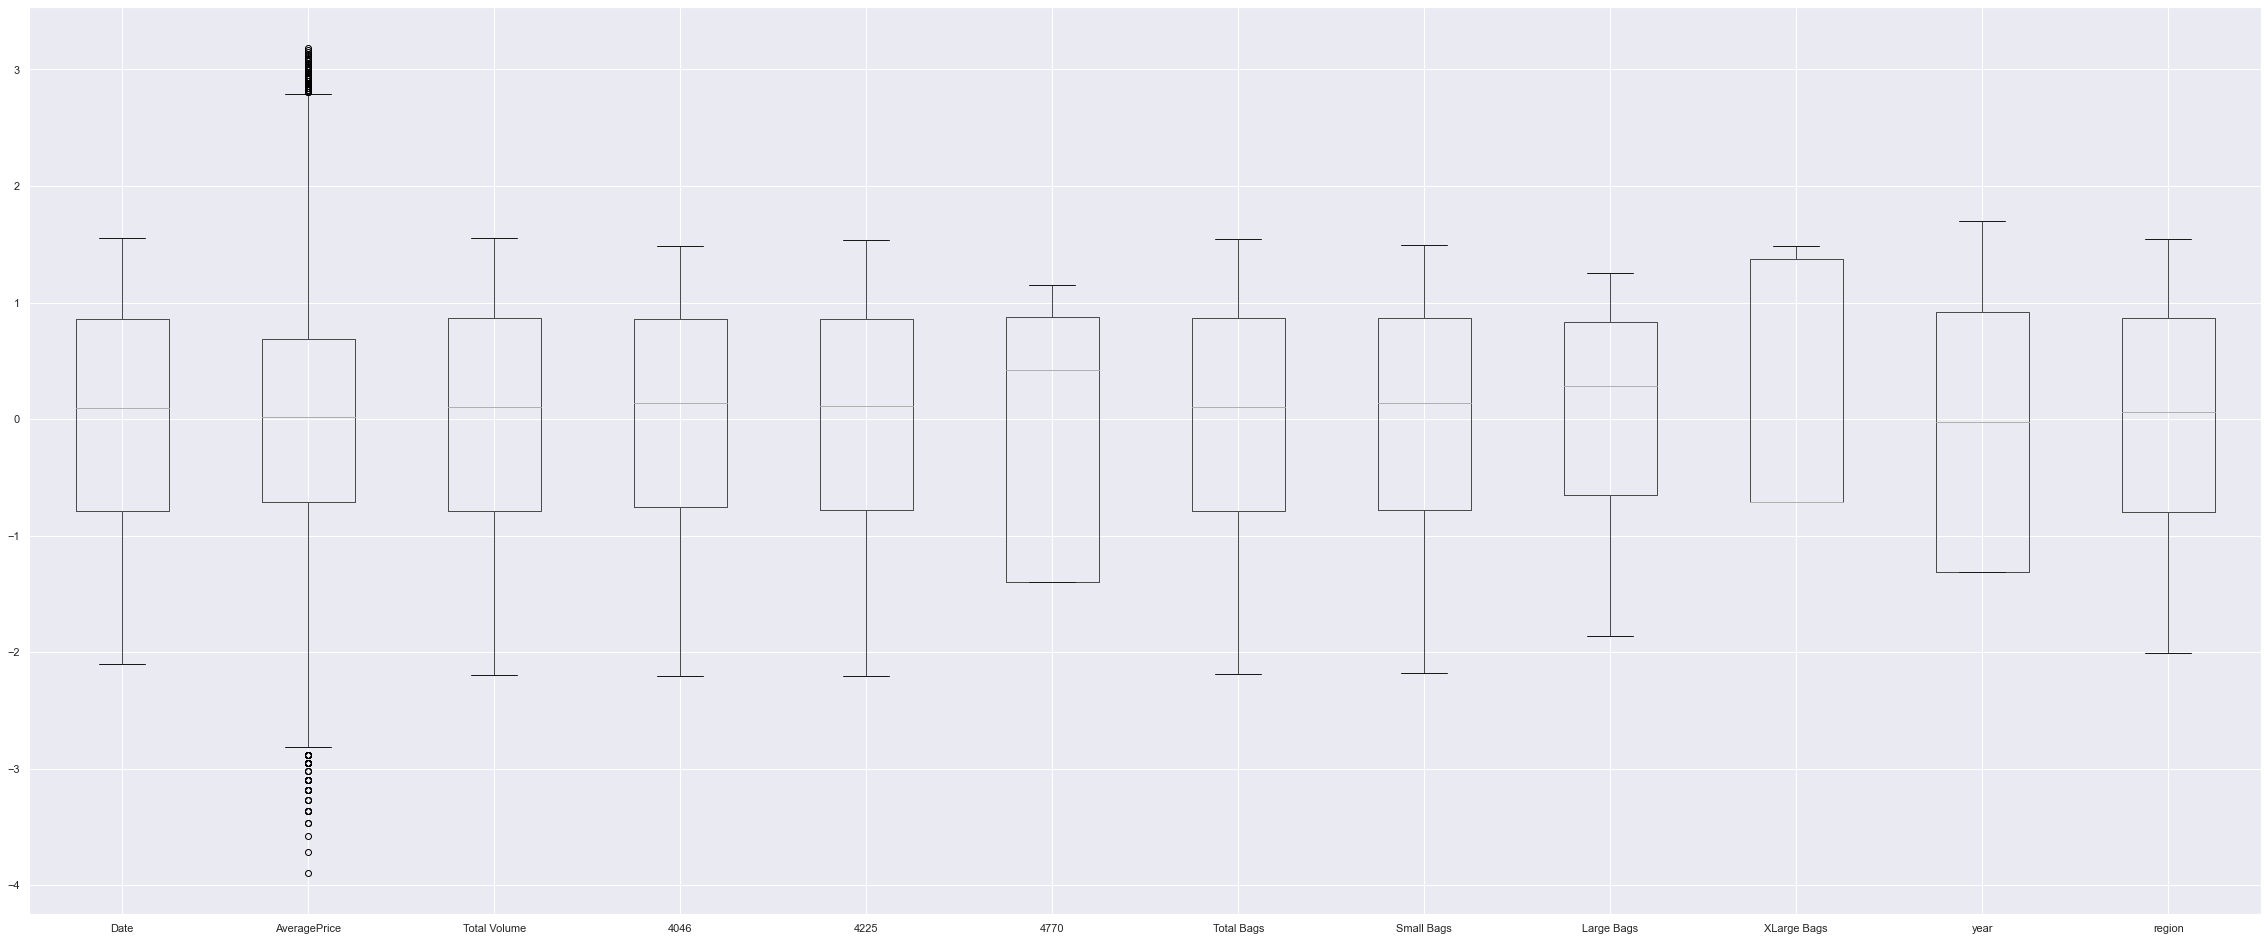

In [99]:
x.iloc[:,0:22].boxplot(figsize=[40,20])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [100]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [101]:
maxAccu=0
maxRS=0
for i in range(0,21):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state =i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS) 

Best accuracy is 0.9715068493150685 on Random_state 20


In [102]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .20, random_state = 12)

In [103]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print("Accuracy",accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 96.13698630136986
[[1752   83]
 [  58 1757]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1835
           1       0.95      0.97      0.96      1815

    accuracy                           0.96      3650
   macro avg       0.96      0.96      0.96      3650
weighted avg       0.96      0.96      0.96      3650



In [104]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print("Accuracy",accuracy_score(y_test, preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 99.17808219178083
[[1817   18]
 [  12 1803]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1835
           1       0.99      0.99      0.99      1815

    accuracy                           0.99      3650
   macro avg       0.99      0.99      0.99      3650
weighted avg       0.99      0.99      0.99      3650



In [105]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print("Accuracy",accuracy_score(y_test, predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 99.83561643835617
[[1834    1]
 [   5 1810]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1835
           1       1.00      1.00      1.00      1815

    accuracy                           1.00      3650
   macro avg       1.00      1.00      1.00      3650
weighted avg       1.00      1.00      1.00      3650



In [106]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

ad_pred = svc.predict(x_test)
print("Accuracy",accuracy_score(y_test, ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy 99.31506849315068
[[1823   12]
 [  13 1802]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1835
           1       0.99      0.99      0.99      1815

    accuracy                           0.99      3650
   macro avg       0.99      0.99      0.99      3650
weighted avg       0.99      0.99      0.99      3650



In [107]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print("cross validation score of Logistic Regression model :",scr.mean())

cross validation score of Logistic Regression model : 0.9522158144284228


In [108]:
scr=cross_val_score(rf, x, y, cv=5)
print("cross validation score of Random Forest model :",scr.mean())

cross validation score of Random Forest model : 0.9876147114803455


In [109]:
scr=cross_val_score(svc, x, y, cv=5)
print("cross validation score of SVC model :",scr.mean())

cross validation score of SVC model : 0.9819160963596707


In [110]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_features': ['auto', 'sqrt', 'log2'],
             'max_depth' : [4,5,6,7,8],
             'criterion' :['gini' , 'entropy']}

In [116]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2'}

In [117]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.9947945205479453

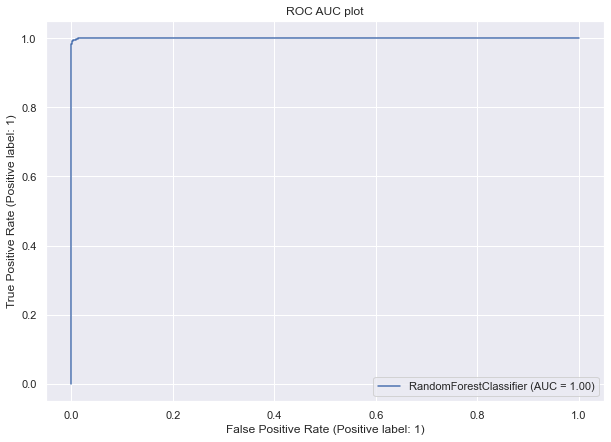

In [118]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

In [119]:
import joblib 
joblib.dump(GCV.best_estimator_,"AvocadoModel.pkl")

['AvocadoModel.pkl']